In [1]:
#Import library to connect to Google Trends 

from pytrends.request import TrendReq
pytrends = TrendReq(hl = 'en-US', tz = 360)

#Import Matplot & Seaborn to graph data 
import matplotlib.pyplot as plt
import seaborn as sns

#hl corresponds to the preferred language 
#tz corresponds to the TimeZone, Google uses US CT that equals '360'

In [2]:
#Call the API to search the keywords I want, based on the interest over time. 

keyword_list = ['Amazon', 'Mercado Libre', 'Liverpool', 'Best Buy']
pytrends.build_payload(keyword_list, cat = 0, timeframe = 'today 5-y', geo = 'MX', gprop = '')
mx_retailers = pytrends.interest_over_time()

#keywords: variable where I saved the keywords to get data for 
#categories: set to '0' so the API can search for the keywords an all the categories 
#timeframe: date to start from, I set it to the last 5 years 
#geo: two letter country abbreviation 
#gprop: what Google property to filter to (ex. images, news, youtube, shopping results, web searches)
    #I left it empty so it searches the default which is web searches 
#Interest Over Time: parameter that returns historical, indexed data for when the keyword was searched most.

In [3]:
#Organize the data frame and add 'Year' and 'Month' columns to filtear easily
mx_retailers2 = mx_retailers.reset_index()
mx_retailers2['Year'] = mx_retailers2['date'].dt.year
mx_retailers2['Month'] = mx_retailers2['date'].dt.month

mx_retailers2.to_csv('MX_Retailers.csv')

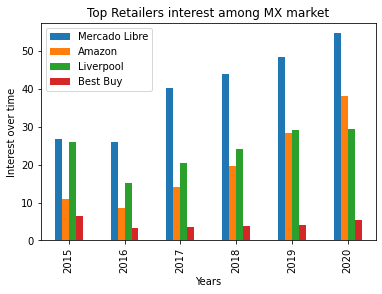

In [8]:
#Create a Pivot Table that groups the information as needed prior to graph

sales_type = mx_retailers2.groupby(['Year']).agg({'Mercado Libre': 'mean', 'Amazon':'mean', 'Liverpool':'mean', 'Best Buy':'mean'})

#Build a bar graph to visualize data
sales_type.plot.bar()
plt.title('Top Retailers interest among MX market')
plt.xlabel('Years')
plt.ylabel('Interest over time');


In [5]:
#Resources

#https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f
#https://pypi.org/project/pytrends/
#https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
#https://sites.google.com/site/tomihasa/google-language-codes

In [9]:
def time_trends (keyword_list, period, file_name):
    '''Brings the interest over time according to the keywords and timeframe selected.'''
    
    #Call the API to search the keywords I want, based on the interest over time.
    pytrends.build_payload(keyword_list, cat = 0, timeframe = period, geo = 'MX', gprop = '')
    mx_retailers = pytrends.interest_over_time().reset_index()
    
    #Organize the data frame by adding 'Year' and 'Month' columns to filtear easily
    mx_retailers['Year'] = mx_retailers['date'].dt.year
    mx_retailers['Month'] = mx_retailers['date'].dt.month
    
    #Save the file as a csv for further analysis 
    mx_retailers.to_csv(file_name)


In [25]:
def region_trends (keyword_list, period, file_name):
    '''Brings the interest by region according to the keywords and timeframe selected.'''
    
    #Call the API to search the keywords I want, based on the interest over time.
    pytrends.build_payload(keyword_list, cat = 0, timeframe = period, geo = 'MX', gprop = '')
    retailer_region = pytrends.interest_by_region(resolution = 'MX', inc_low_vol = True, inc_geo_code = False).reset_index()
    
    #Rename the colum because it will function as the primary key 
    retailer_region.rename(columns = {'geoName':'Estado'}, inplace = True)
    
    #Save the file as a csv for further analysis 
    retailer_region.to_csv(file_name)

In [10]:
#Data 1: Evaluate the interest on different retailers in MX. 

time_trends(['Amazon', 'Mercado Libre', 'Liverpool', 'Best Buy'], 'today 5-y', 'MX_retail.csv')

In [11]:
#Data 2: Evaluate interest spikes during 2020 to assess if there is a spike due to COVID-19. 

time_trends(['Amazon', 'Mercado Libre', 'Liverpool', 'Best Buy'], '2020-01-02 2020-12-12', 'MX_retail2020.csv')

In [26]:
#Data 3: Evaluate interest on Amazon MX per state in 2020.

region_trends(['covid-19', 'cubrebocas', 'gel antibacterial', 'alberca', 'rompecabezas', 'termometro'], '2020-01-02 2020-12-12', 'AmazonMX_2020.csv')